# Importing Libraries

In [15]:
!pip install --upgrade bokeh==2.4.3

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import clear_output

import numpy as np
import pandas as pd
import yaml
import os

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.io as pio

from bokeh.plotting import figure, show, output_notebook, output_file
from bokeh.palettes import all_palettes
from bokeh.models import HoverTool, LabelSet, Legend, ColumnDataSource, LinearColorMapper, BasicTicker, PrintfTickFormatter, ColorBar, GeoJSONDataSource
from bokeh.embed import components
from bokeh.resources import CDN

from bokeh.models.transforms import LinearInterpolator
output_notebook()

# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows


Loading BokehJS ...

C:\Users\43xqu\AppData\Local\Temp\ipykernel_15212\2862266035.py:28: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


60

# Loading dataset

In [2]:
df = pd.read_csv('../data_raw/final.csv')

In [3]:
# Add date
df['DATE'] = df['MO'].astype('string') + '-' + df['DY'].astype('string') + '-' + df['YEAR'].astype('string')
df['DATE'] = pd.to_datetime(df['DATE'], format='%m-%d-%Y')

In [4]:
def mo_to_qua(mo):
    if mo <= 3:
        return 1
    elif mo > 3 and mo <= 6:
        return 2
    elif mo > 6 and mo <= 9:
        return 3
    else:
        return 4

df['QUARTER'] = df['MO'].map(mo_to_qua)

# Ploting

### 1. Distribution

<AxesSubplot: xlabel='Temperature', ylabel='Count'>

[Text(0.5, 1.0, 'Phân phối của cột : Temperature')]

<AxesSubplot: xlabel='Relative_Humidity', ylabel='Count'>

[Text(0.5, 1.0, 'Phân phối của cột : Relative_Humidity')]

<AxesSubplot: xlabel='Specific_Humidity', ylabel='Count'>

[Text(0.5, 1.0, 'Phân phối của cột : Specific_Humidity')]

<AxesSubplot: xlabel='Precipitation', ylabel='Count'>

[Text(0.5, 1.0, 'Phân phối của cột : Precipitation')]

<AxesSubplot: xlabel='Pressure', ylabel='Count'>

[Text(0.5, 1.0, 'Phân phối của cột : Pressure')]

<AxesSubplot: xlabel='Wind_Speed', ylabel='Count'>

[Text(0.5, 1.0, 'Phân phối của cột : Wind_Speed')]

<AxesSubplot: xlabel='Wind_Direction', ylabel='Count'>

[Text(0.5, 1.0, 'Phân phối của cột : Wind_Direction')]

<AxesSubplot: xlabel='pm25', ylabel='Count'>

[Text(0.5, 1.0, 'Phân phối của cột : pm25')]

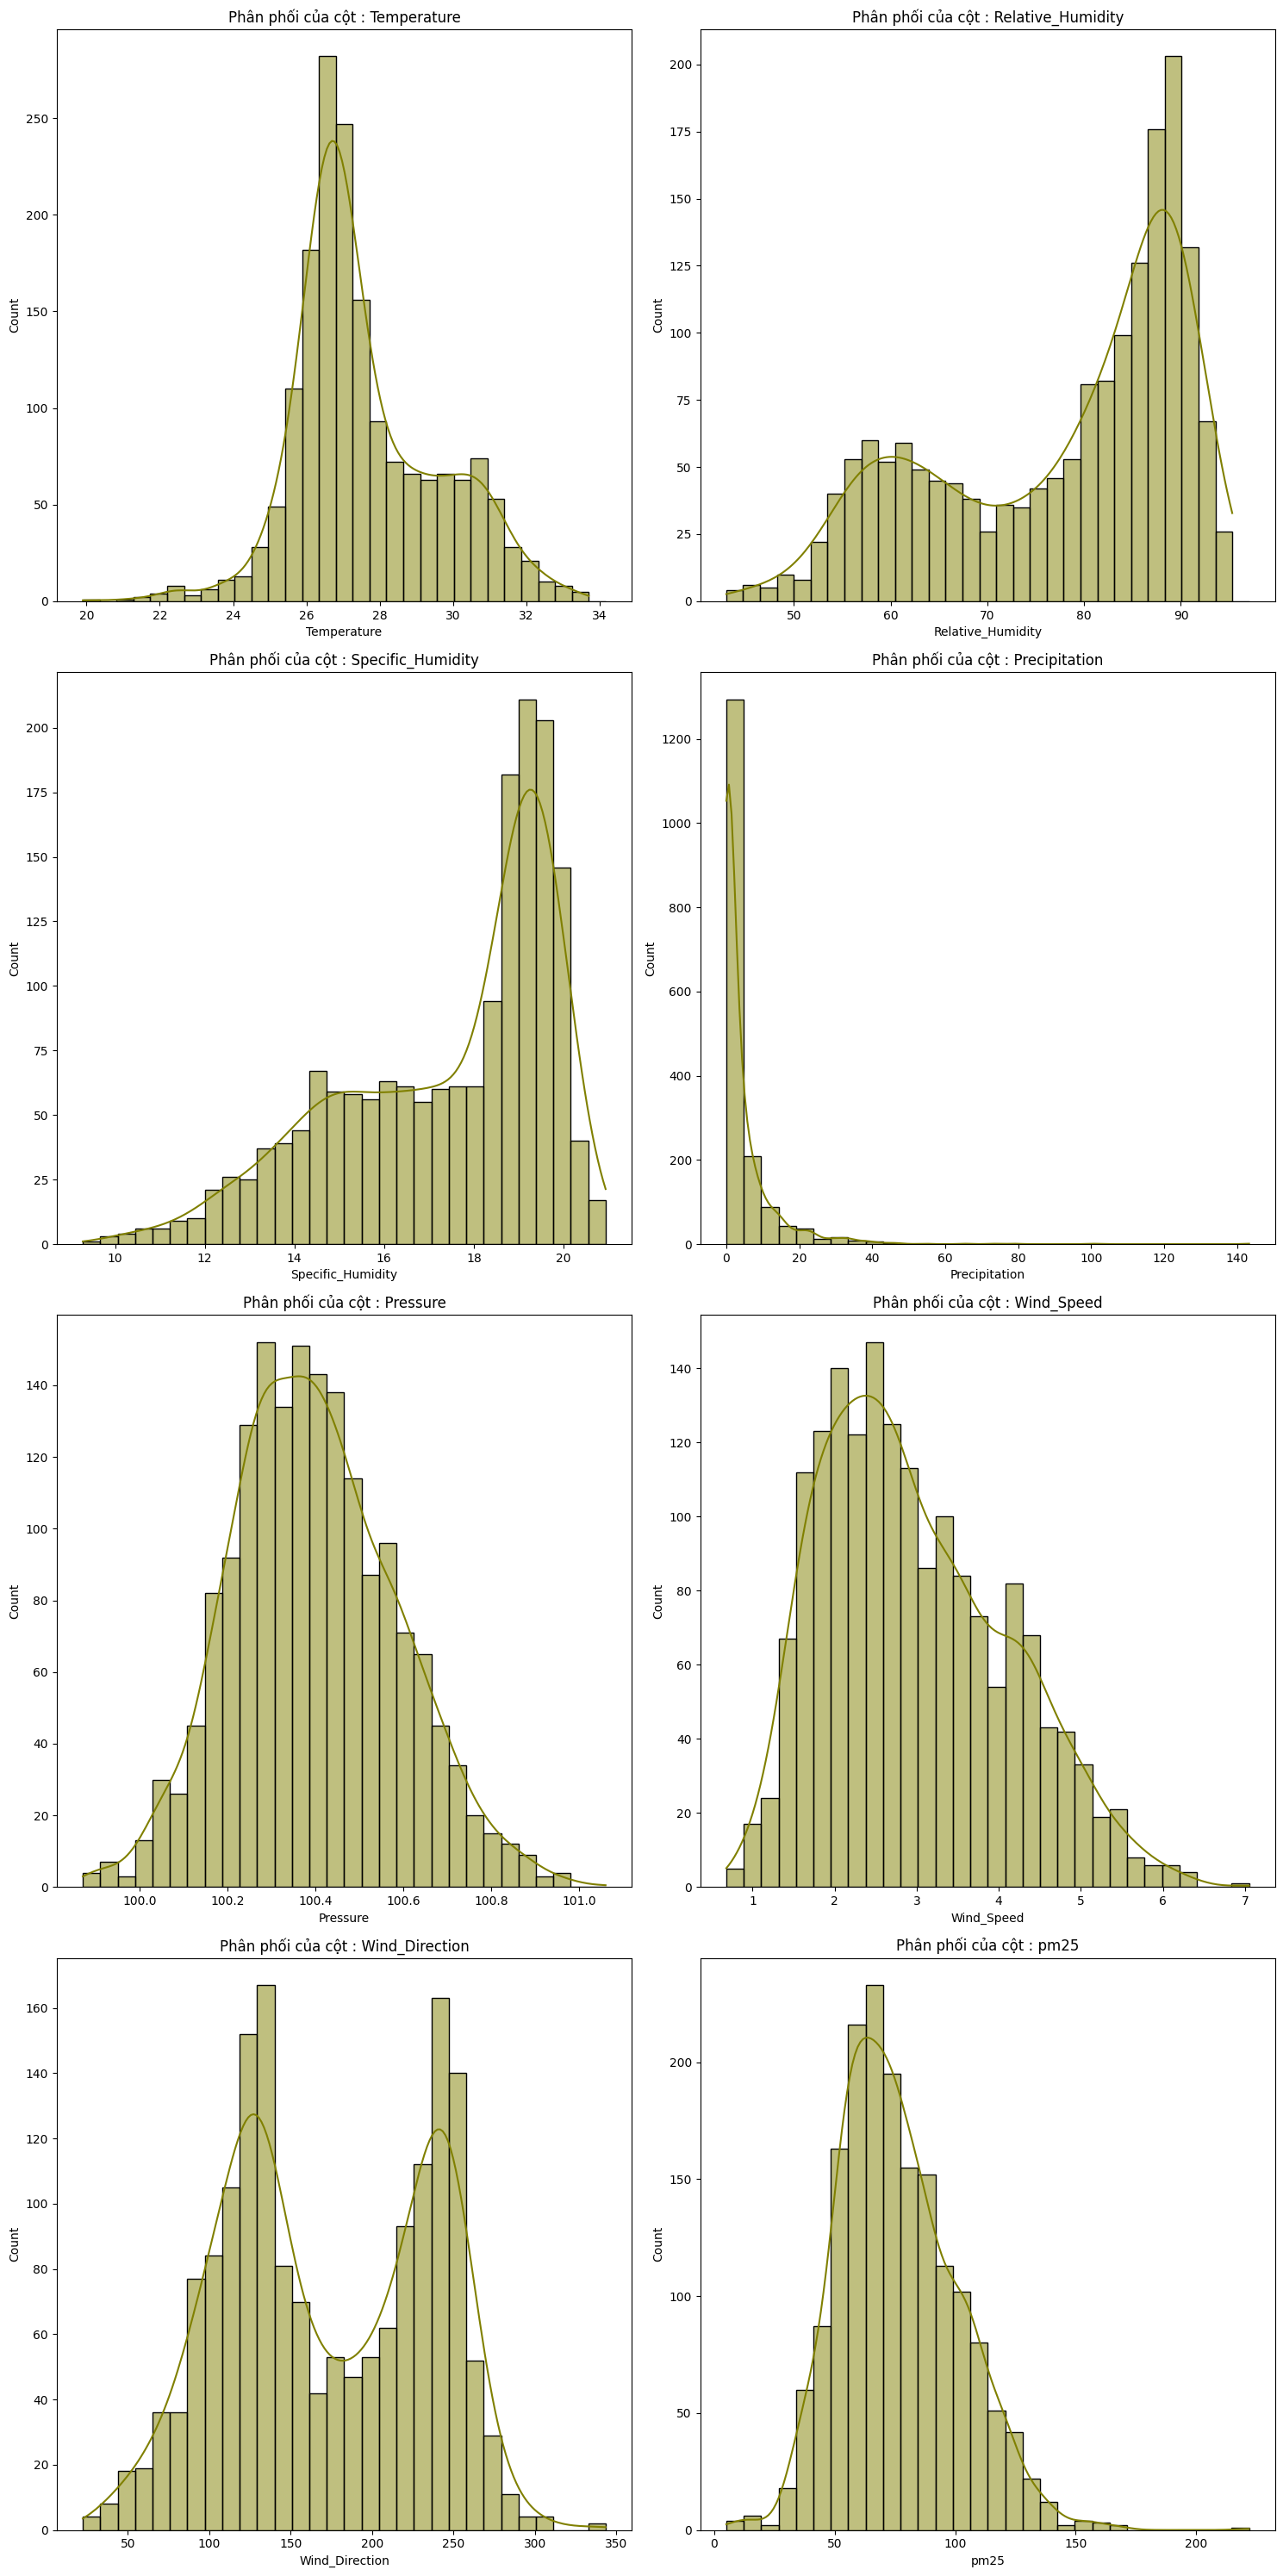

In [5]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 30), sharex=False, sharey=False)
axes = axes.ravel() # Index for 1D
cols = df.columns[3:-1]

for col, ax in zip(cols, axes):
    binwidth = (df[col].max() - df[col].min()) / 30
    sns.histplot(data=df, x=col, binwidth=binwidth, kde=True, color="olive", ax=ax)
    ax.set(title=f'Phân phối của cột : {col}')
    
fig.tight_layout()
plt.show()

__Nhận xét: `Temperature`, `Pressure`, `Wind_Speed` và `pm25` có phân phối gần dạng chuẩn nhất__

### 2. Correlation & Heatmap

C:\Users\43xqu\AppData\Local\Temp\ipykernel_16696\431010136.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)


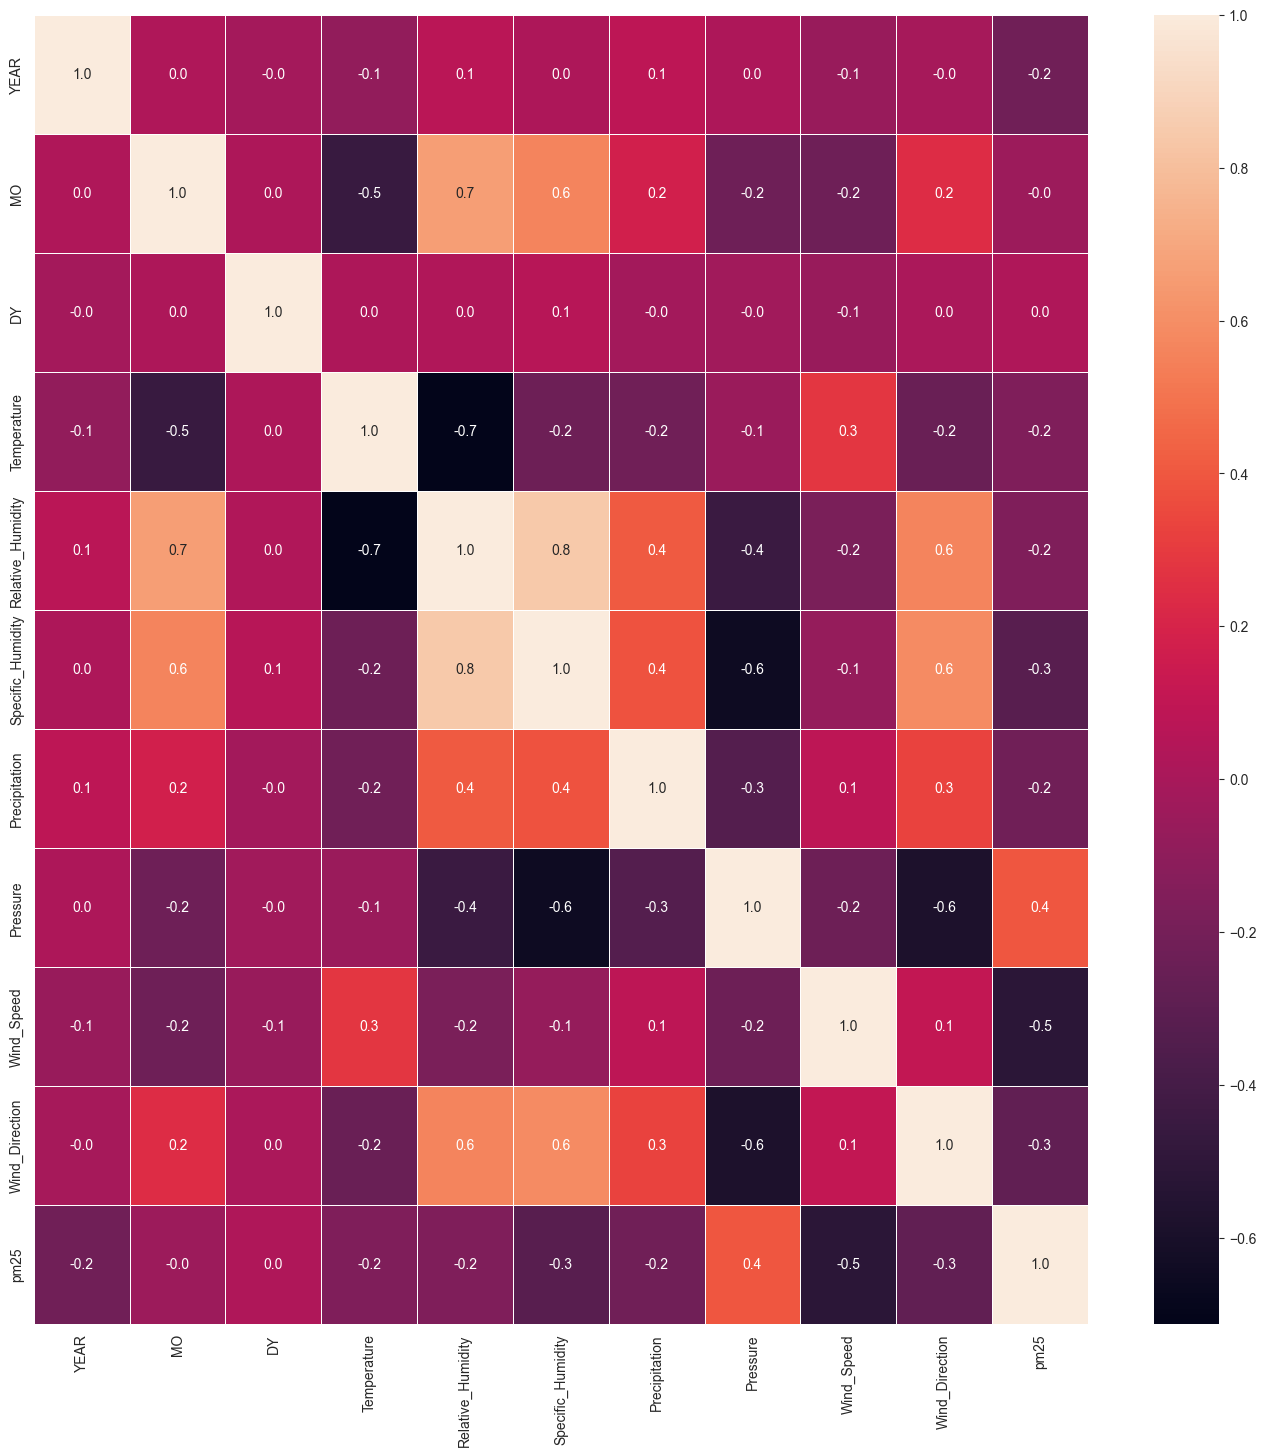

In [20]:
fig, ax = plt.subplots(figsize=(17, 17))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)
plt.show();

__Nhận xét độ tương quan với thuộc tính `pm25`:__
* Tương đối thấp.
* `Wind_Speed` là mạnh nhất bằng `0.5`.

### 3. Features per `MONTH` & `YEAR`
* Các features theo MO
* Các features theo YEAR

__Per Months__

<AxesSubplot: xlabel='MO', ylabel='Temperature'>

[Text(0.5, 1.0, 'Temperature theo Tháng')]

<AxesSubplot: xlabel='MO', ylabel='Relative_Humidity'>

[Text(0.5, 1.0, 'Relative_Humidity theo Tháng')]

<AxesSubplot: xlabel='MO', ylabel='Specific_Humidity'>

[Text(0.5, 1.0, 'Specific_Humidity theo Tháng')]

<AxesSubplot: xlabel='MO', ylabel='Precipitation'>

[Text(0.5, 1.0, 'Precipitation theo Tháng')]

<AxesSubplot: xlabel='MO', ylabel='Pressure'>

[Text(0.5, 1.0, 'Pressure theo Tháng')]

<AxesSubplot: xlabel='MO', ylabel='Wind_Speed'>

[Text(0.5, 1.0, 'Wind_Speed theo Tháng')]

<AxesSubplot: xlabel='MO', ylabel='Wind_Direction'>

[Text(0.5, 1.0, 'Wind_Direction theo Tháng')]

<AxesSubplot: xlabel='MO', ylabel='pm25'>

[Text(0.5, 1.0, 'pm25 theo Tháng')]

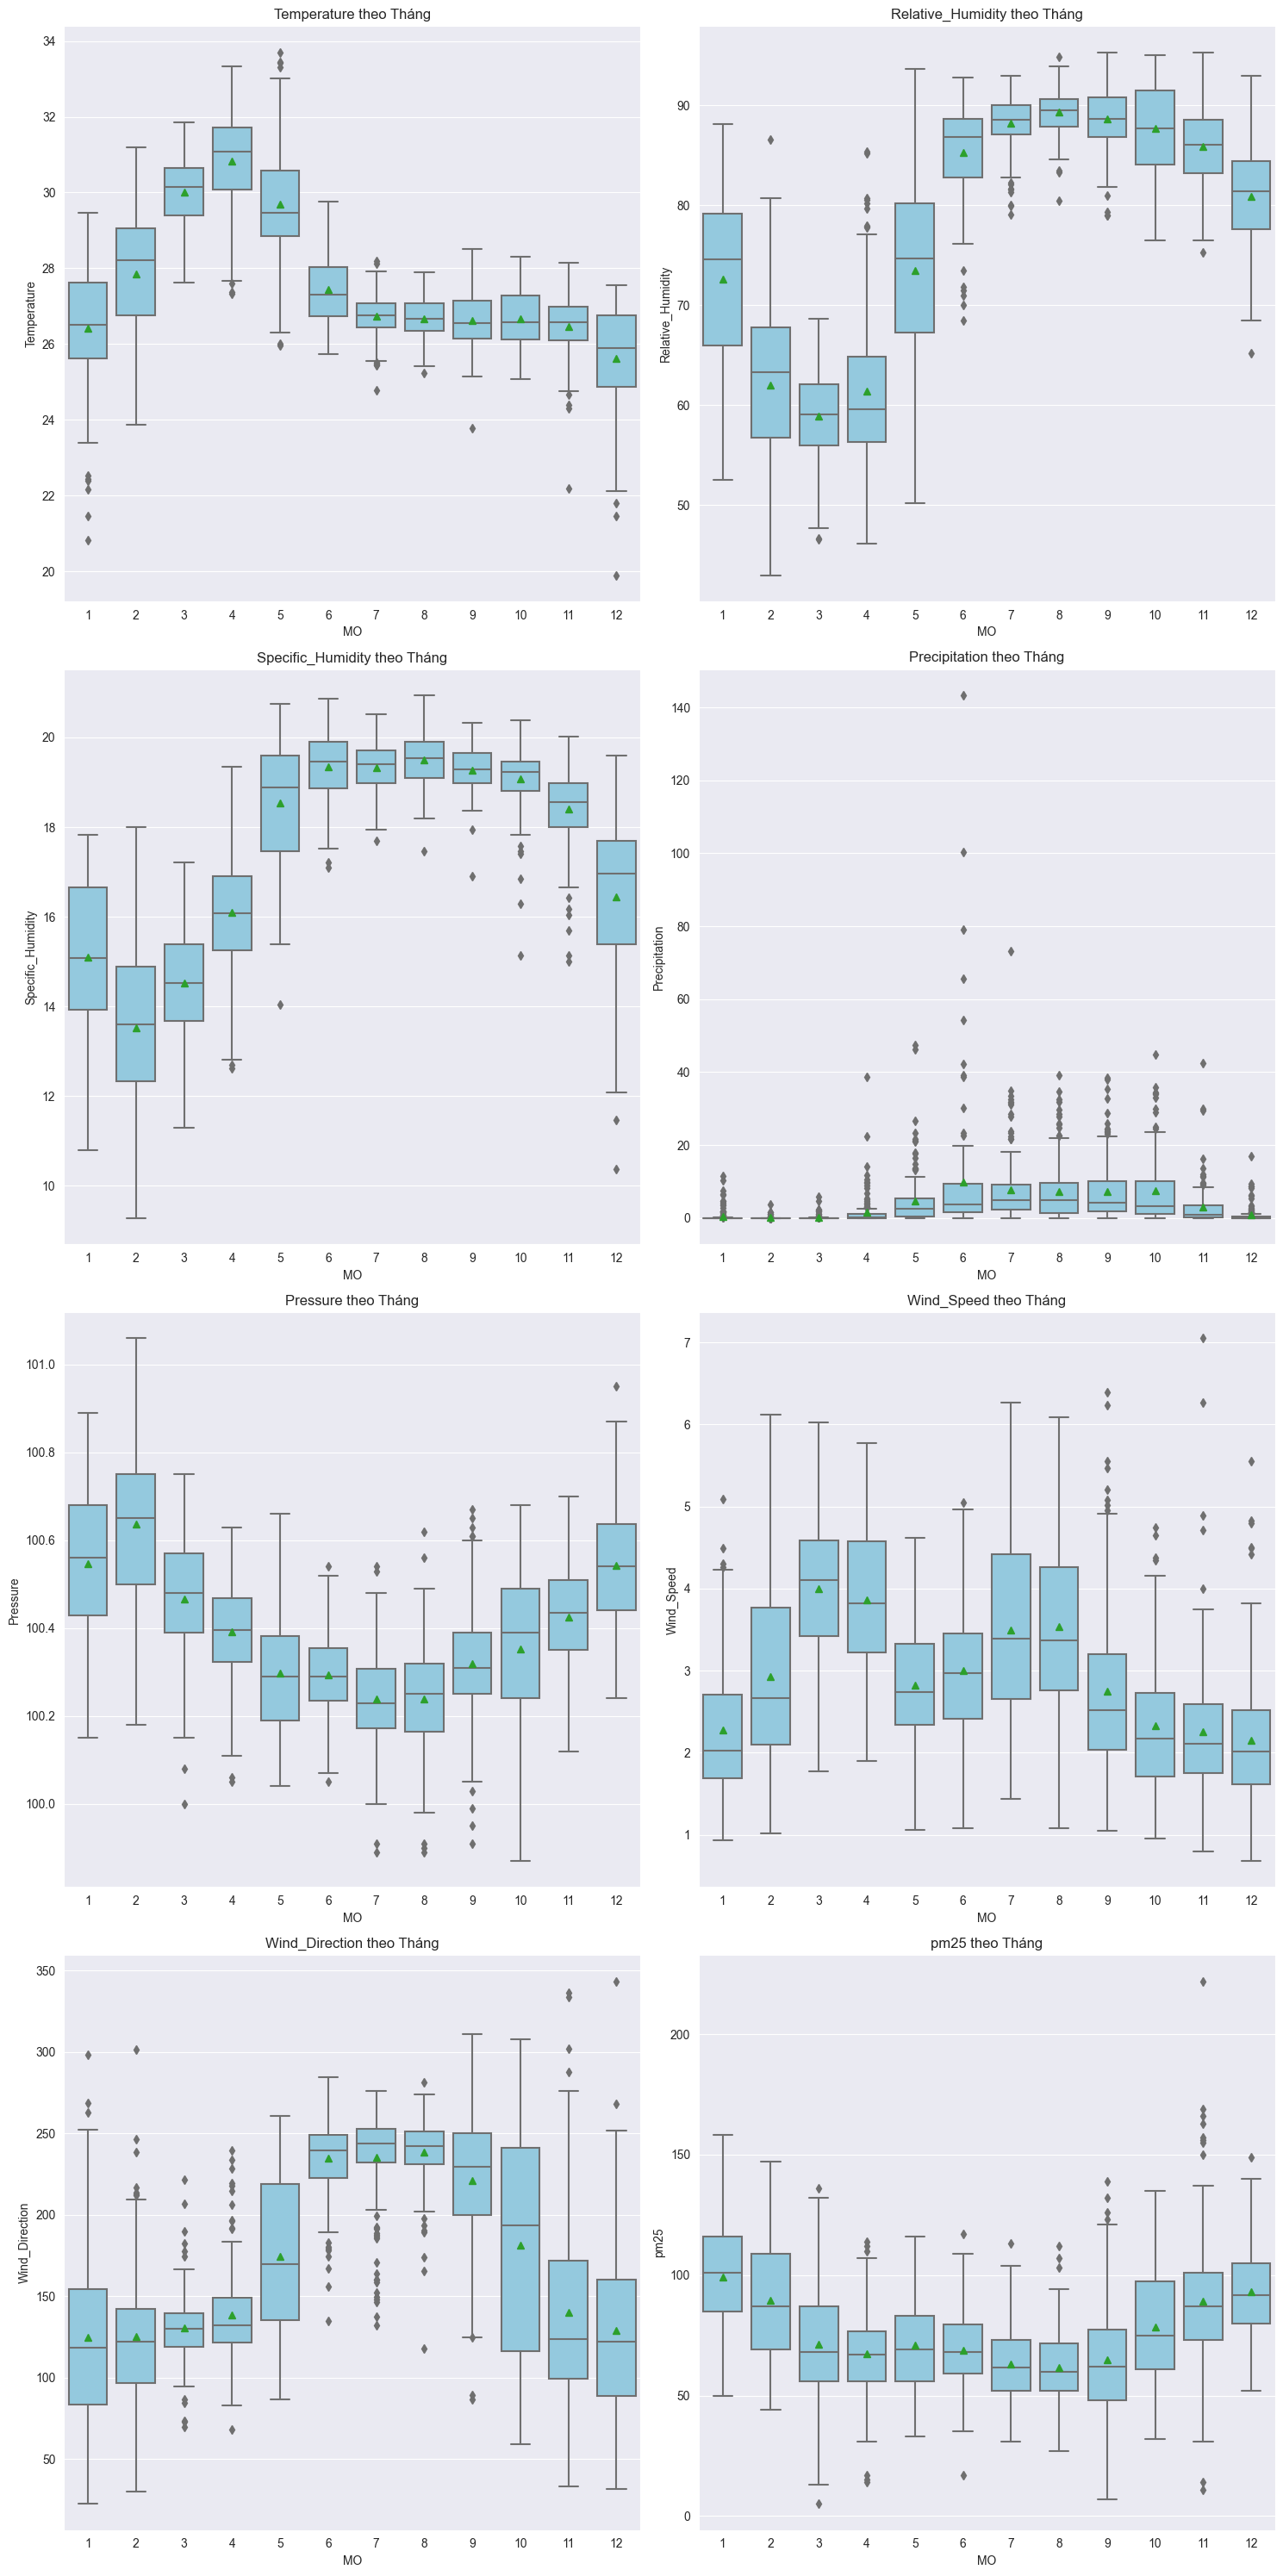

In [21]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 30), sharex=False, sharey=False)
axes = axes.ravel() # Index for 1D
cols = df.columns[3:-1]

for col, ax in zip(cols, axes):
    sns.boxplot(data=df, x='MO', y=col, showmeans=True, color="skyblue", ax=ax)
    ax.set(title=f'{col} theo Tháng')
    
fig.tight_layout()
plt.show()

__Per Year__

<AxesSubplot: xlabel='YEAR', ylabel='Temperature'>

[Text(0.5, 1.0, 'Temperature theo Tháng')]

<AxesSubplot: xlabel='YEAR', ylabel='Relative_Humidity'>

[Text(0.5, 1.0, 'Relative_Humidity theo Tháng')]

<AxesSubplot: xlabel='YEAR', ylabel='Specific_Humidity'>

[Text(0.5, 1.0, 'Specific_Humidity theo Tháng')]

<AxesSubplot: xlabel='YEAR', ylabel='Precipitation'>

[Text(0.5, 1.0, 'Precipitation theo Tháng')]

<AxesSubplot: xlabel='YEAR', ylabel='Pressure'>

[Text(0.5, 1.0, 'Pressure theo Tháng')]

<AxesSubplot: xlabel='YEAR', ylabel='Wind_Speed'>

[Text(0.5, 1.0, 'Wind_Speed theo Tháng')]

<AxesSubplot: xlabel='YEAR', ylabel='Wind_Direction'>

[Text(0.5, 1.0, 'Wind_Direction theo Tháng')]

<AxesSubplot: xlabel='YEAR', ylabel='pm25'>

[Text(0.5, 1.0, 'pm25 theo Tháng')]

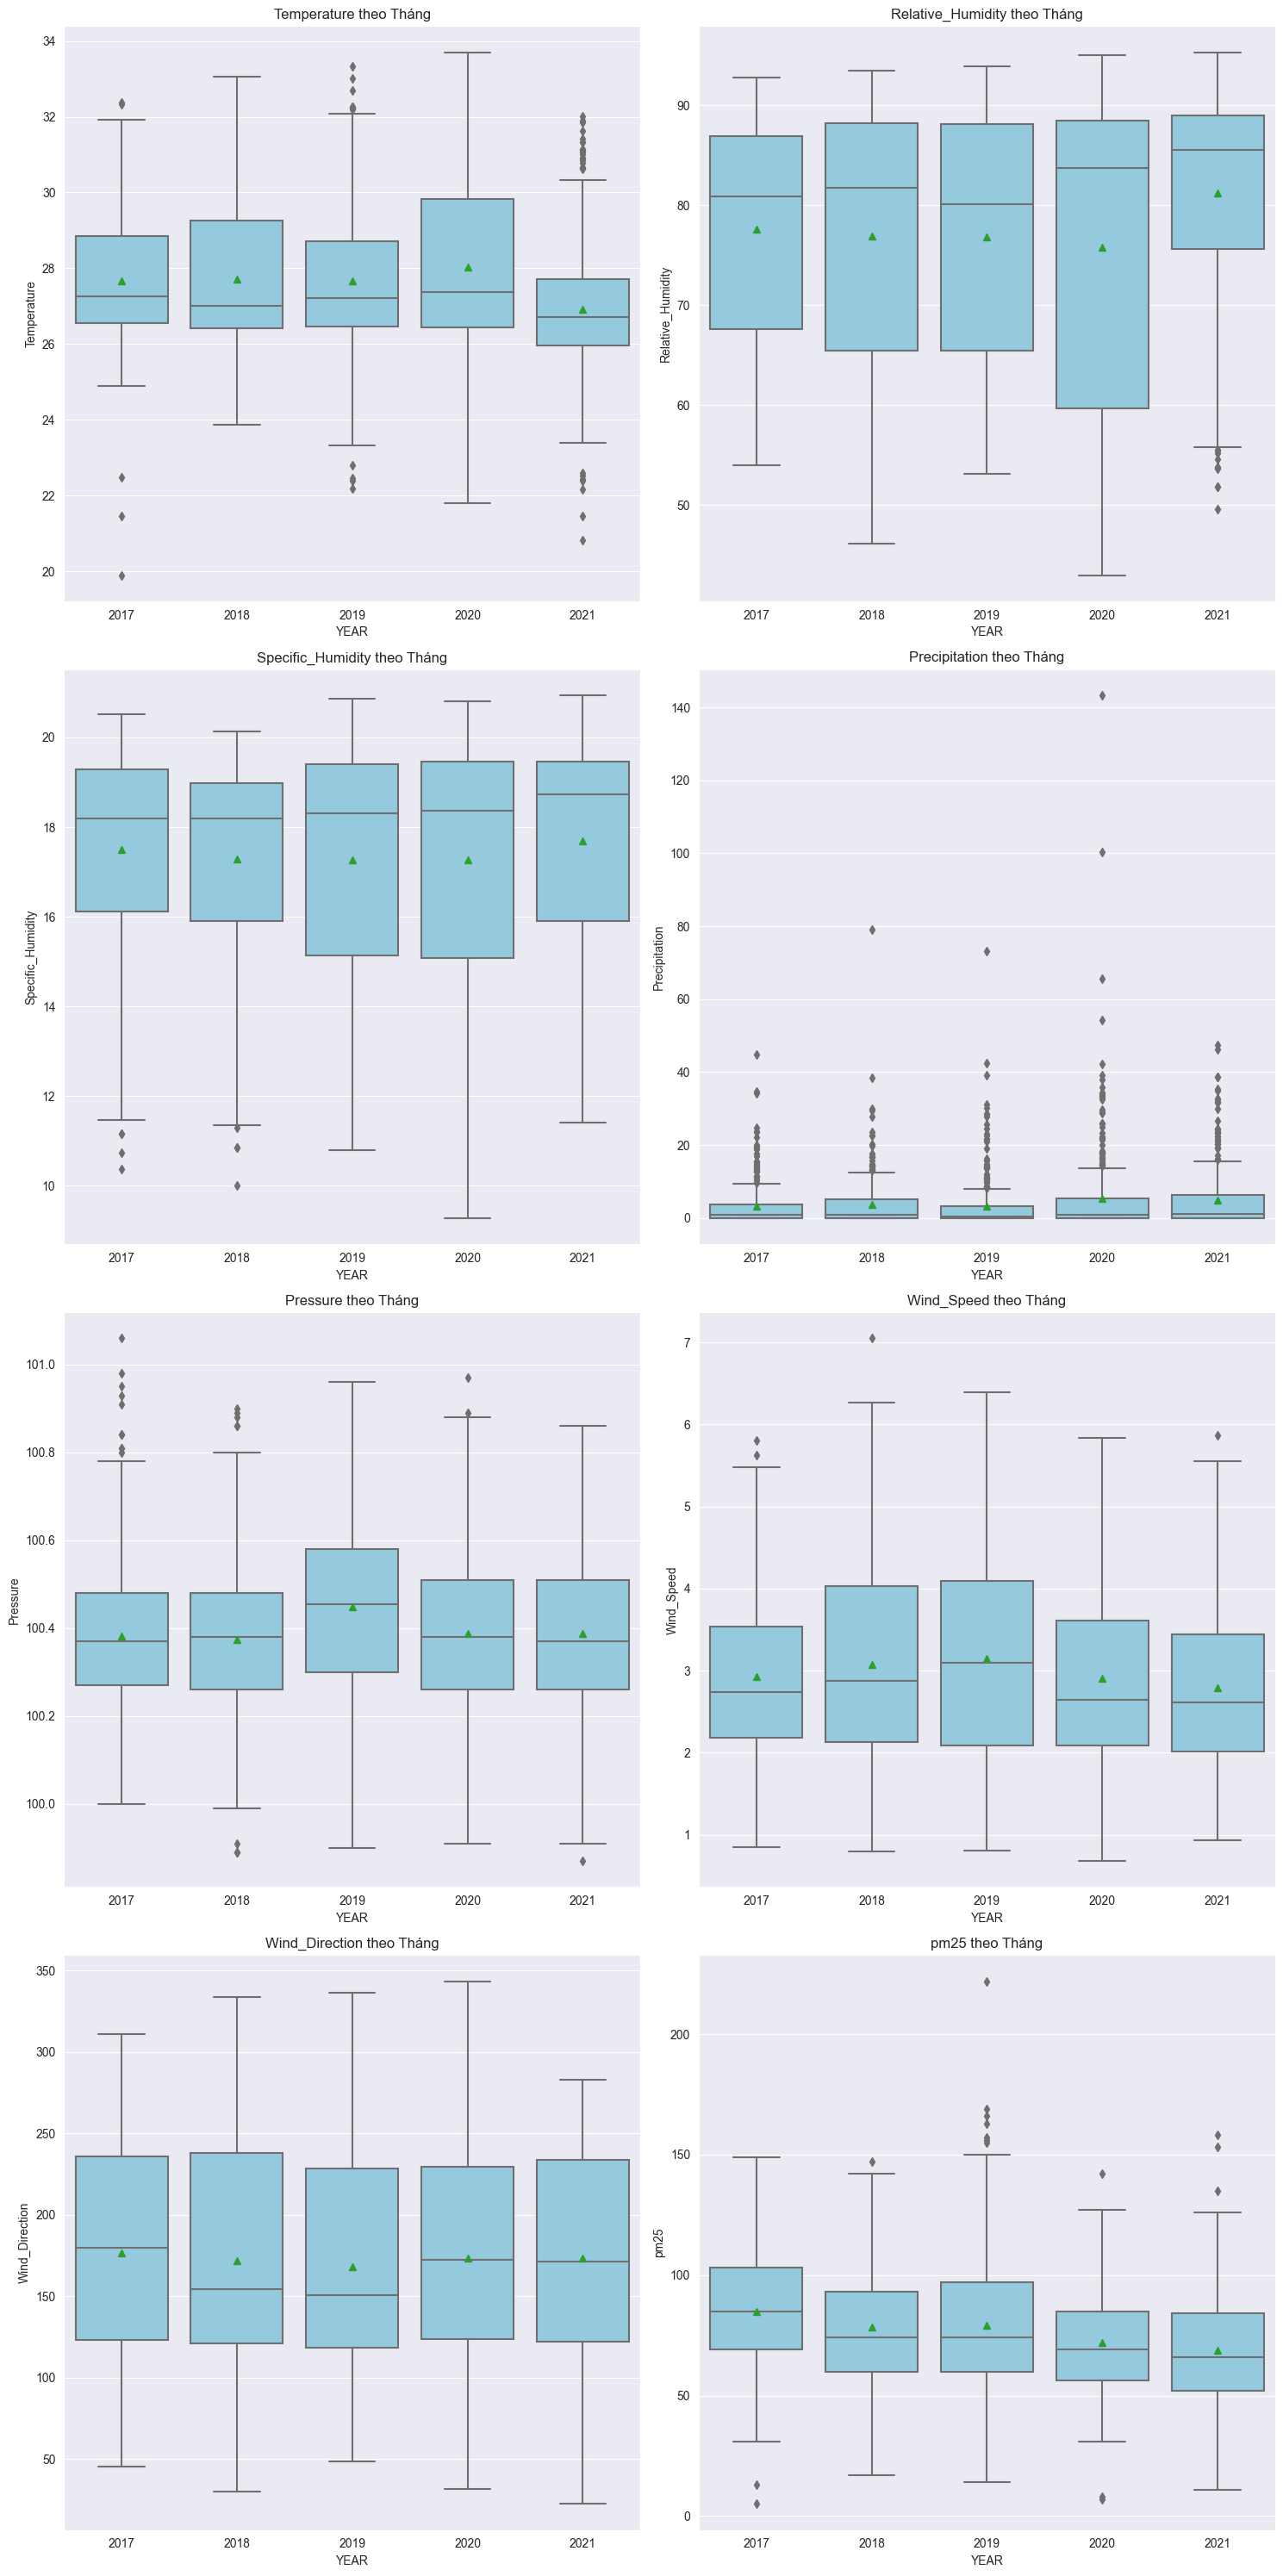

In [22]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 30), sharex=False, sharey=False)
axes = axes.ravel() # Index for 1D
cols = df.columns[3:-1]

for col, ax in zip(cols, axes):
    sns.boxplot(data=df, x='YEAR', y=col, showmeans=True, color="skyblue", ax=ax)
    ax.set(title=f'{col} theo Tháng')
    
fig.tight_layout()
plt.show()

### 3. Regression Plot với `pm25`

<AxesSubplot: xlabel='Temperature', ylabel='pm25'>

[Text(0.5, 1.0, 'Regression Plot của Temperature theo pm25')]

<AxesSubplot: xlabel='Relative_Humidity', ylabel='pm25'>

[Text(0.5, 1.0, 'Regression Plot của Relative_Humidity theo pm25')]

<AxesSubplot: xlabel='Specific_Humidity', ylabel='pm25'>

[Text(0.5, 1.0, 'Regression Plot của Specific_Humidity theo pm25')]

<AxesSubplot: xlabel='Precipitation', ylabel='pm25'>

[Text(0.5, 1.0, 'Regression Plot của Precipitation theo pm25')]

<AxesSubplot: xlabel='Pressure', ylabel='pm25'>

[Text(0.5, 1.0, 'Regression Plot của Pressure theo pm25')]

<AxesSubplot: xlabel='Wind_Speed', ylabel='pm25'>

[Text(0.5, 1.0, 'Regression Plot của Wind_Speed theo pm25')]

<AxesSubplot: xlabel='Wind_Direction', ylabel='pm25'>

[Text(0.5, 1.0, 'Regression Plot của Wind_Direction theo pm25')]

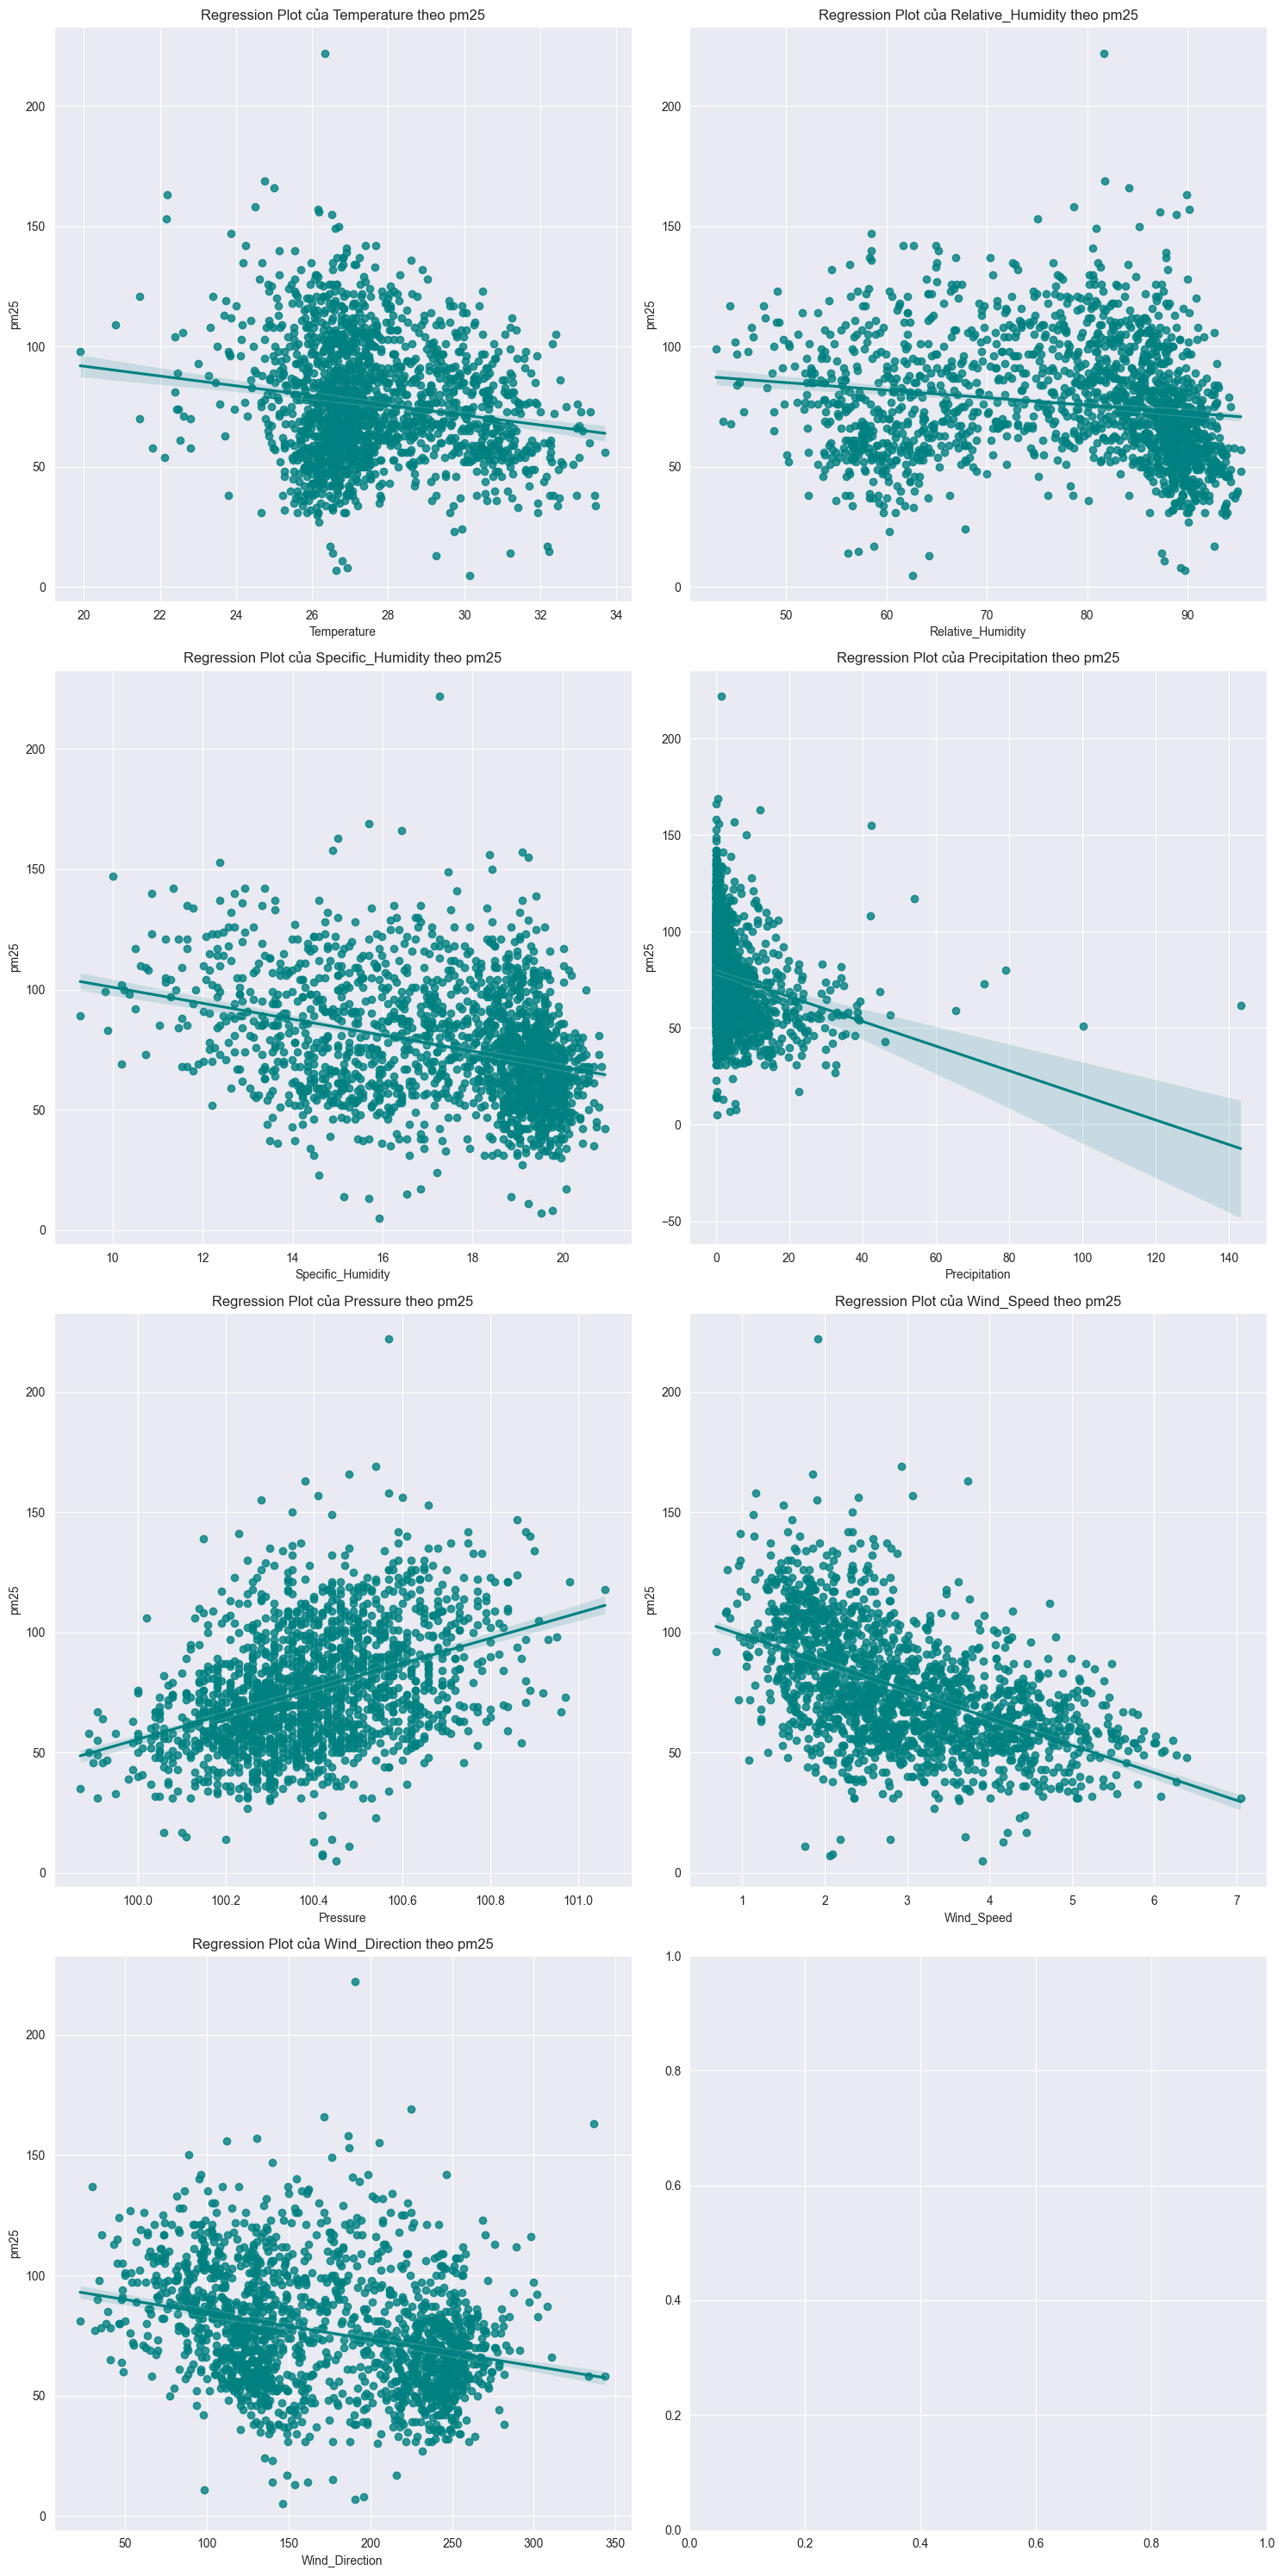

In [23]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 30), sharex=False, sharey=False)
axes = axes.ravel() # Index for 1D
cols = df.columns[3:-2]

for col, ax in zip(cols, axes):
    sns.regplot(data=df, x=col, y='pm25', color="teal", ax=ax)
    ax.set(title=f'Regression Plot của {col} theo pm25')
    
fig.tight_layout()
plt.show()

### 4. Residual Plot với `pm25`

<AxesSubplot: xlabel='Temperature', ylabel='pm25'>

[Text(0.5, 1.0, 'Risidual Plot của Temperature theo pm25')]

<AxesSubplot: xlabel='Relative_Humidity', ylabel='pm25'>

[Text(0.5, 1.0, 'Risidual Plot của Relative_Humidity theo pm25')]

<AxesSubplot: xlabel='Specific_Humidity', ylabel='pm25'>

[Text(0.5, 1.0, 'Risidual Plot của Specific_Humidity theo pm25')]

<AxesSubplot: xlabel='Precipitation', ylabel='pm25'>

[Text(0.5, 1.0, 'Risidual Plot của Precipitation theo pm25')]

<AxesSubplot: xlabel='Pressure', ylabel='pm25'>

[Text(0.5, 1.0, 'Risidual Plot của Pressure theo pm25')]

<AxesSubplot: xlabel='Wind_Speed', ylabel='pm25'>

[Text(0.5, 1.0, 'Risidual Plot của Wind_Speed theo pm25')]

<AxesSubplot: xlabel='Wind_Direction', ylabel='pm25'>

[Text(0.5, 1.0, 'Risidual Plot của Wind_Direction theo pm25')]

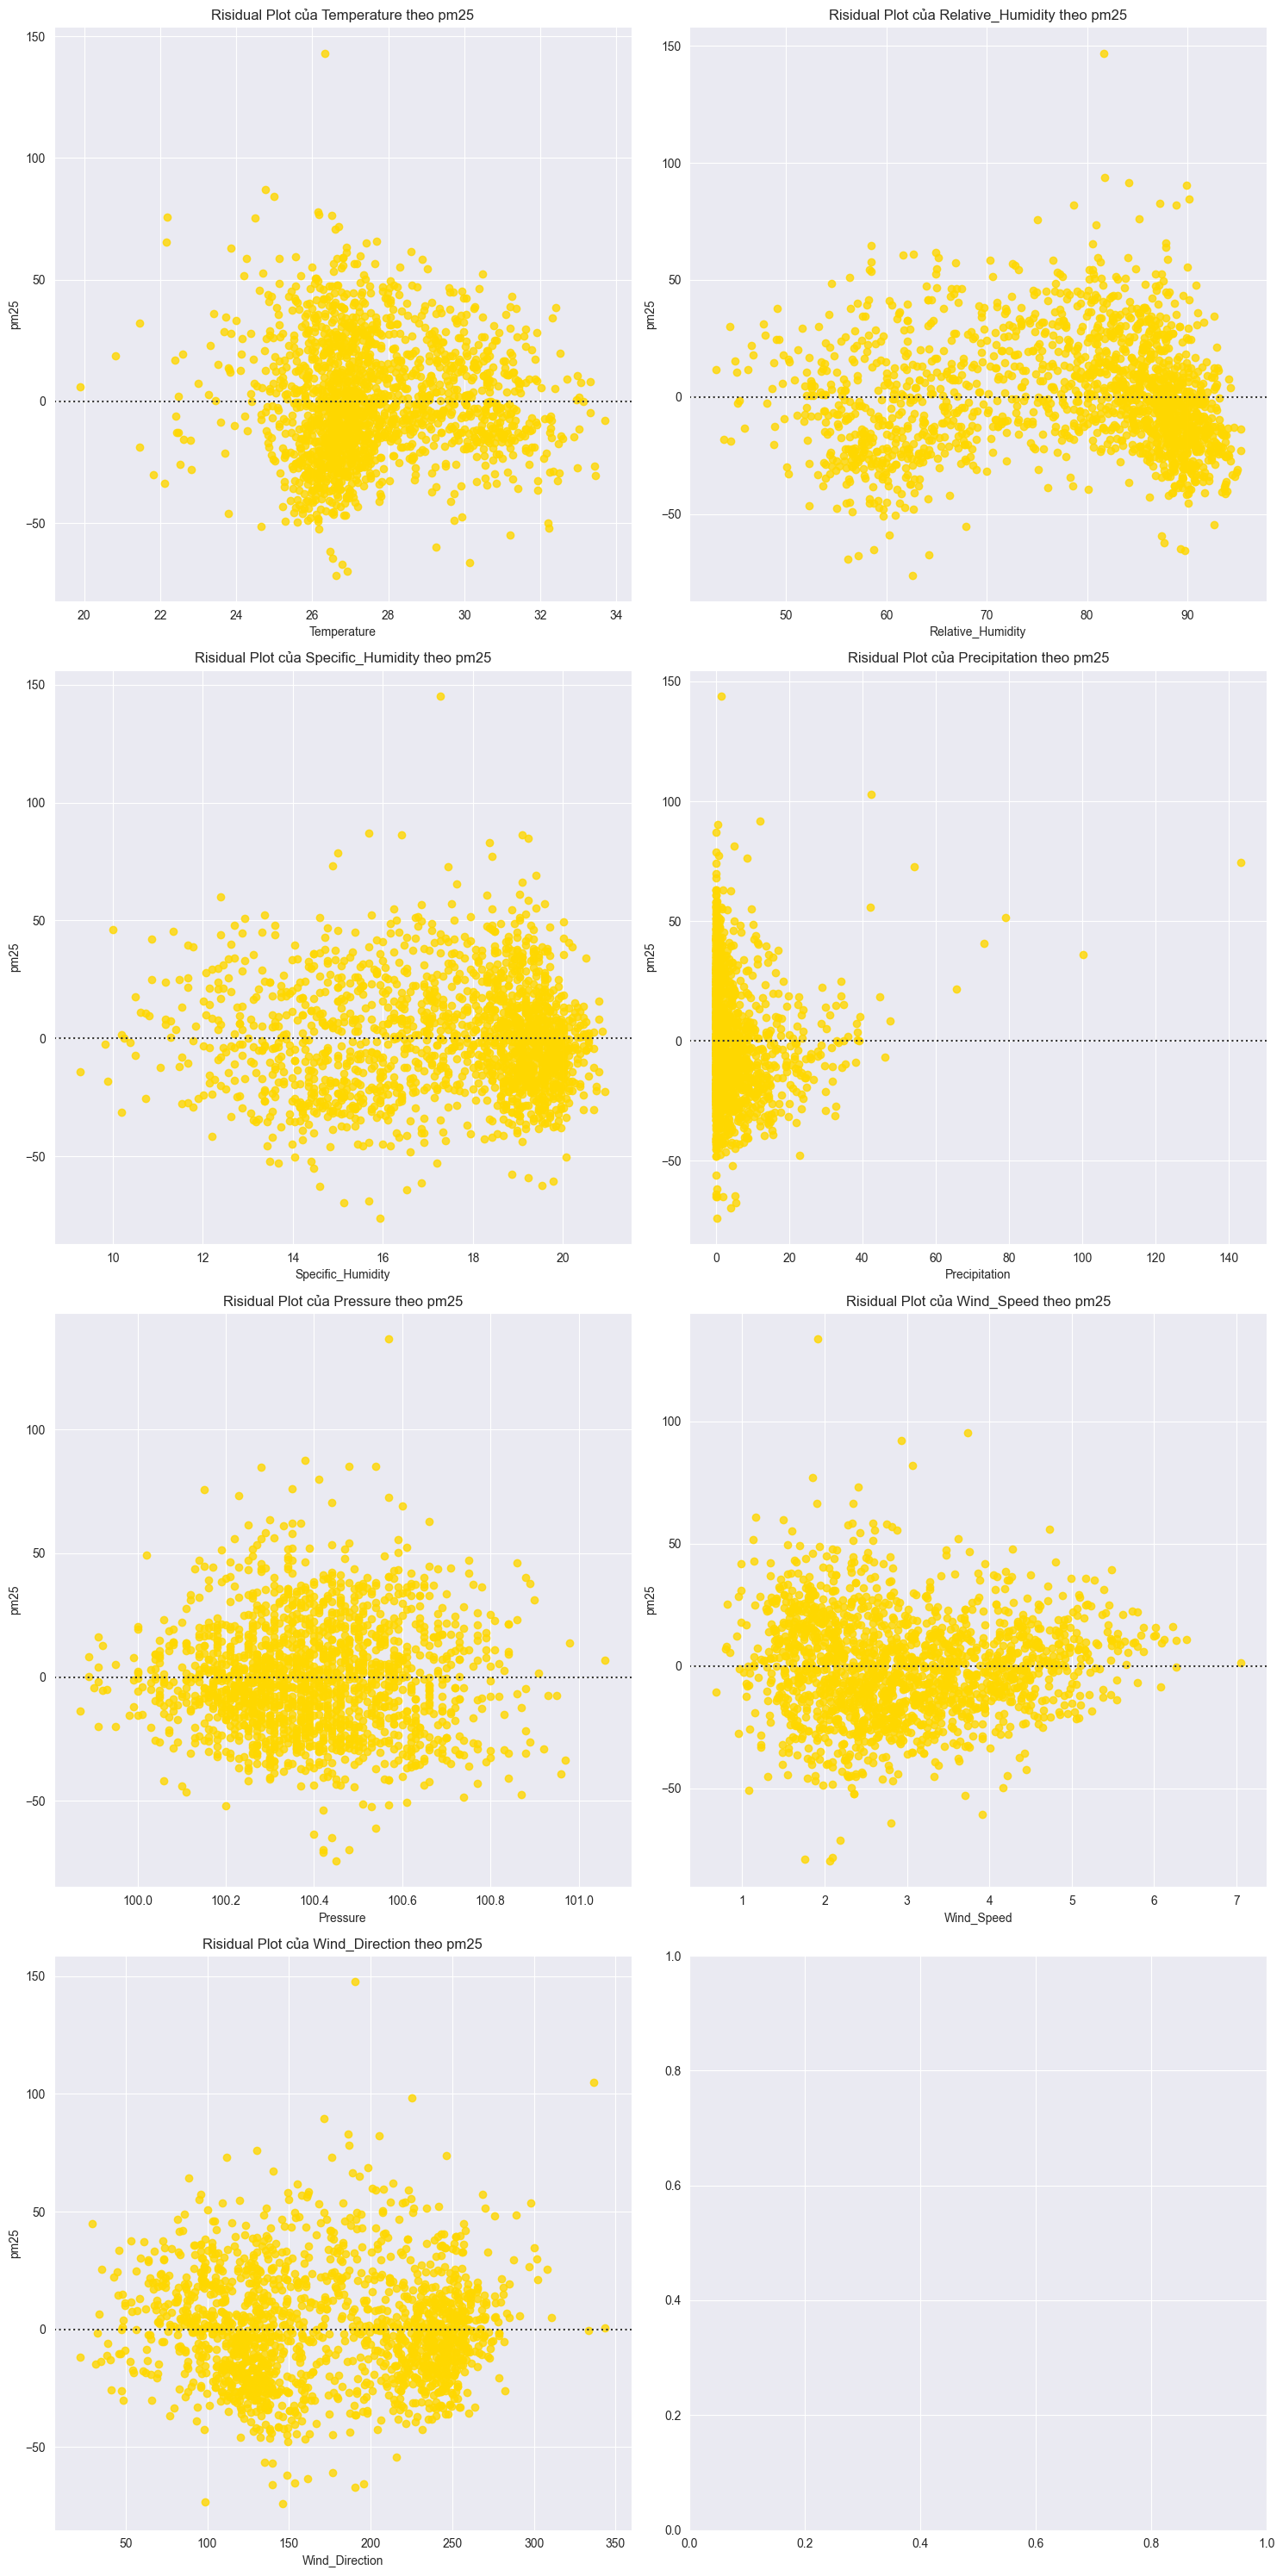

In [24]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 30), sharex=False, sharey=False)
axes = axes.ravel() # Index for 1D
cols = df.columns[3:-2]

for col, ax in zip(cols, axes):
    sns.residplot(data=df, x=col, y='pm25', color="gold", ax=ax)
    ax.set(title=f'Risidual Plot của {col} theo pm25')
    
fig.tight_layout()
plt.show()

### 4. Time Series Plot

In [49]:
def line_circle_plot_top_10(col, n):
    # Get indeces
    idx_top = df.sort_values(by=col, ascending=False)[:n].index

    # Sources
    source_circle = ColumnDataSource(
        pd.DataFrame(dict(
            DATE=[df.loc[i]['DATE'] for i in idx_top],
            COL=[df.loc[i][col] for i in idx_top]
        ))
    )
    source_line = ColumnDataSource(df)

    # Figure
    p = figure(
        x_axis_type='datetime',
        plot_height=700,
        plot_width=1500,
        tools='save, pan, box_zoom, wheel_zoom, reset',
    )

    # Plot
    p.line(x='DATE', y=col, source=source_line, line_color='#747C92', line_width=1)
    p.circle(
        x='DATE', 
        y='COL', 
        source=source_circle,
        #size=15
        size={
            'field': 'COL',
            'transform': LinearInterpolator(
                    x=[df[col].min(), df[col].max()],
                    y=[1, 30]
            )
        },
        color='#3A2449'
    )

    p.add_tools(
        HoverTool(
            tooltips="<b>Ngày: </b> @DATE{%F} <br> <b>Mức độ " + col + ": </b> @" + col,
            formatters={'@DATE': 'datetime'},
            mode='mouse'
        )
    )

    # Title
    p.title_location = "above"
    p.title.text_font_size = "25px"
    p.title.align = "center"
    p.title.background_fill_color = None
    p.title.text_color = "black"

    p.xaxis.axis_label = 'Ngày'
    p.yaxis.axis_label = col
    p.title.text = "Biểu đồ đột biến của " + col + " và " + str(n) + " ngày có mức độ " + col + " cao nhất"

    show(p)

In [50]:
line_circle_plot_top_10('Temperature', 10)

In [51]:
def line_circle_plot_top_10(col):
    # Get indeces
    idx_top_10 = df.sort_values(by=col, ascending=False)[:10].index

    # Sources
    source_circle = ColumnDataSource(
        pd.DataFrame(dict(
            DATE=[df.loc[i]['DATE'] for i in idx_top_10],
            COL=[df.loc[i][col] for i in idx_top_10]
        ))
    )
    source_line = ColumnDataSource(df)

    # Figure
    p = figure(
        x_axis_type='datetime',
        plot_height=700,
        plot_width=1400,
        tools='save, pan, box_zoom, wheel_zoom, reset',
    )

    # Plot
    p.line(x='DATE', y=col, source=source_line, line_color='#747C92', line_width=1)
    p.circle(
        x='DATE', 
        y='COL', 
        source=source_circle,
        #size=15
        size={
            'field': 'COL',
            'transform': LinearInterpolator(
                    x=[df[col].min(), df[col].max()],
                    y=[1, 30]
            )
        },
        color='#3A2449'
    )

    p.add_tools(
        HoverTool(
            tooltips="<b>Ngày: </b> @DATE{%F} <br> <b>Mức độ " + col + ": </b> @" + col,
            formatters={'@DATE': 'datetime'},
            mode='mouse'
        )
    )
    p.xaxis.axis_label = 'Ngày'
    p.yaxis.axis_label = col
    p.title.text = "Biểu đồ đột biến của " + col + " và 10 ngày có mức độ " + col + " cao nhất"
    
    show(p)

__Top 10 ngày có mức độ `pm25` cao nhất__

In [52]:
line_circle_plot_top_10('pm25')

__Top 10 ngày có mức độ `Temperature` cao nhất__

In [27]:
line_circle_plot_top_10('Temperature')

Figure(id='1053', ...)

__Top 10 ngày có mức độ `Relative_Humidity` cao nhất__

In [28]:
line_circle_plot_top_10('Relative_Humidity')

Figure(id='1104', ...)

__Top 10 ngày có mức độ `Specific_Humidity` cao nhất__

In [29]:
line_circle_plot_top_10('Specific_Humidity')

Figure(id='1155', ...)

__Top 10 ngày có mức độ `Precipitation` cao nhất__

In [30]:
line_circle_plot_top_10('Precipitation')

Figure(id='1206', ...)

__Top 10 ngày có mức độ `Pressure` cao nhất__

In [31]:
line_circle_plot_top_10('Pressure')

Figure(id='1257', ...)

__Top 10 ngày có mức độ `Wind_Speed` cao nhất__

In [32]:
line_circle_plot_top_10('Wind_Speed')

Figure(id='1308', ...)

__Top 10 ngày có mức độ `Wind_Direction` cao nhất__

In [33]:
line_circle_plot_top_10('Wind_Direction')

Figure(id='1359', ...)

### 6. Avg. each `Numerical var` by `Categorical var`

In [175]:
def avg_per_category_barplot(category, col):
    df_temp = df[[category, col]]
    df_groupby = df_temp.groupby([category], as_index=False).mean()

    # Sources
    ranges = [str(x) for x in list(df_groupby[category])]
    counts = [str(x) for x in list(df_groupby[col])]

    from bokeh.io import curdoc
    curdoc().theme = "dark_minimal"
    
    # Source
    source = ColumnDataSource(data=dict(ranges=ranges, counts=counts))

    # Figure
    p = figure(
        y_range=ranges,
        width=1400,
        height=600,
        x_axis_label=col,
        y_axis_label=category,
        title="Trung bình " + col + " theo " + category,
        toolbar_location="below",
        tools='save, pan, box_zoom, wheel_zoom, reset'
    )
    p.hbar(y='ranges', right='counts', source=source, height=0.8)

    # Add tools    
    p.add_tools(
        HoverTool(
            tooltips="Năm: @ranges <br> Mức độ " + col + " trung bình: @counts",
            #formatters={'@ranges': 'int'},
            mode='mouse'
        )
    )

    p.title_location = "above"
    p.title.text_font_size = "25px"
    p.title.align = "center"
    p.title.background_fill_color = "green"
    p.title.text_color = "white"
    
    show(p)

__Avg. each `Feature` by `MO`__

In [176]:
avg_per_category_barplot('MO', 'Temperature')

__Avg. each `Feature` by `YEAR`__

In [177]:
avg_per_category_barplot('YEAR', 'Temperature')

### 7. Avg. each `Quarter` in each `YEAR`

In [42]:
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.io import curdoc

def avg_quarter_year_barplot(col):
    df_temp = df[['YEAR', 'QUARTER', col]]
    df_groupby = df_temp.groupby(['YEAR', 'QUARTER'], as_index=False).mean()

    curdoc().theme = "dark_minimal"

    # Source
    years = [str(x) for x in list(df_groupby['YEAR'].unique())]
    quarters = [str(x) for x in list(df_groupby['QUARTER'].unique())]

    data = {
        'YEAR': years,
        '1': list(df_groupby[df_groupby['QUARTER'] == 1][col]),
        '2': list(df_groupby[df_groupby['QUARTER'] == 2][col]),
        '3': list(df_groupby[df_groupby['QUARTER'] == 3][col]),
        '4': list(df_groupby[df_groupby['QUARTER'] == 4][col]),
    }

    x = [(year, quarter) for year in years for quarter in quarters]
    counts = sum(zip(data['1'], data['2'], data['3'], data['4']), ())

    source = ColumnDataSource(data=dict(x=x, counts=counts))

    p = figure(
        x_range=FactorRange(*x),
        width=1000,
        height=400,
        x_axis_label='Quý trong năm',
        y_axis_label=col,
        title="Trung bình " + col + " theo Quý trong các Năm",
        toolbar_location="below",
        tools='save, pan, box_zoom, wheel_zoom, reset'
    )

    p.vbar(x='x', top='counts', width=0.8, source=source)

    # Add tools    
    p.add_tools(
        HoverTool(
            tooltips="Năm, Quý: @x<br>Mức độ " + col + ": @counts",
            mode='mouse'
        )
    )

    p.y_range.start = 0
    p.x_range.range_padding = 0.1
    p.xaxis.major_label_orientation = 1
    p.xgrid.grid_line_color = None

    show(p)

avg_quarter_year_barplot('Temperature')